In [1]:
!pip install openpyxl plotly streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving Bird_Monitoring_Data_FOREST.XLSX to Bird_Monitoring_Data_FOREST (2).XLSX
Saving Bird_Monitoring_Data_GRASSLAND.XLSX to Bird_Monitoring_Data_GRASSLAND (1).XLSX


In [9]:
forest_file = '/content/Bird_Monitoring_Data_FOREST.XLSX'
grassland_file = '/content/Bird_Monitoring_Data_GRASSLAND.XLSX'

In [10]:
# Read all sheets from both Excel files
forest_sheets = pd.read_excel(forest_file, sheet_name=None)
grassland_sheets = pd.read_excel(grassland_file, sheet_name=None)

# Convert dictionary of DataFrames to a single DataFrame for each
forest_df = pd.concat(forest_sheets.values(), ignore_index=True)
grassland_df = pd.concat(grassland_sheets.values(), ignore_index=True)

# Add habitat labels
forest_df['Habitat'] = 'Forest'
grassland_df['Habitat'] = 'Grassland'

# Combine into one full dataset
df = pd.concat([forest_df, grassland_df], ignore_index=True)


/tmp/ipython-input-1803785093.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  grassland_df = pd.concat(grassland_sheets.values(), ignore_index=True)


In [11]:
print("Forest Data:", forest_df.shape)
print("Grassland Data:", grassland_df.shape)
print("Combined Dataset:", df.shape)

df.head()

Forest Data: (8546, 30)
Grassland Data: (8531, 30)
Combined Dataset: (17077, 32)


,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat,TaxonCode,Previously_Obs
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN


In [12]:
#Check Columns and Missing Values

df.info()
df.isnull().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17077 entries, 0 to 17076
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              17077 non-null  object        
 1   Sub_Unit_Code                722 non-null    object        
 2   Site_Name                    8546 non-null   object        
 3   Plot_Name                    17077 non-null  object        
 4   Location_Type                17077 non-null  object        
 5   Year                         17077 non-null  object        
 6   Date                         17077 non-null  datetime64[ns]
 7   Start_Time                   17077 non-null  object        
 8   End_Time                     17077 non-null  object        
 9   Observer                     17077 non-null  object        
 10  Visit                        17077 non-null  object        
 11  Interval_Length              17077 non-nu

,0
Sub_Unit_Code,16355
TaxonCode,8548
Previously_Obs,8546
Site_Name,8531
NPSTaxonCode,8531
Sex,5183
Distance,1486
AcceptedTSN,33
ID_Method,2
Date,0


In [13]:
#Save Merged Dataset (Optional)

df.to_csv('combined_bird_data.csv', index=False)
files.download('combined_bird_data.csv')  # Optional download

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# Convert time columns safely
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce').dt.time
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce').dt.time


In [15]:
#Clean and Convert Date Column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [17]:
# Function to extract season
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Fall'

df['Season'] = df['Month'].apply(get_season)

In [19]:
#Convert Numeric Columns
#Handle Temperature, Humidity, and Initial_Three_Min_Cnt

df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')
df['Initial_Three_Min_Cnt'] = pd.to_numeric(df['Initial_Three_Min_Cnt'], errors='coerce')

In [21]:
# Clean Categorical Columns
# Columns like Flyover_Observed, PIF_Watchlist_Status, Regional_Stewardship_Status, Sex, etc., may contain:
# Mixed casing
# Inconsistent values (FALSE, False, etc.)
# Typos or blanks
# Helper function to convert string to Boolean
def convert_bool(val):
    val = str(val).strip().upper()
    if val == 'TRUE':
        return True
    elif val == 'FALSE':
        return False
    return np.nan  # or keep as is

# Apply to relevant columns
df['Flyover_Observed'] = df['Flyover_Observed'].apply(convert_bool)
df['PIF_Watchlist_Status'] = df['PIF_Watchlist_Status'].apply(convert_bool)
df['Regional_Stewardship_Status'] = df['Regional_Stewardship_Status'].apply(convert_bool)



In [22]:
#Handle Missing Values
missing = df.isnull().sum()
missing[missing > 0]


,0
Sub_Unit_Code,16355
Site_Name,8531
Start_Time,17077
End_Time,17077
ID_Method,2
Distance,1486
AcceptedTSN,33
NPSTaxonCode,8531
TaxonCode,8548
Previously_Obs,8546


In [23]:
# Drop rows with missing Scientific_Name or Common_Name
# Fill Disturbance, Sky, Wind, etc., with 'Unknown' if needed
# For Temperature and Humidity, you may use mean/median imputation

df = df.dropna(subset=['Scientific_Name', 'Common_Name'])
df['Disturbance'] = df['Disturbance'].fillna('Unknown')
df['Sky'] = df['Sky'].fillna('Unknown')
df['Wind'] = df['Wind'].fillna('Unknown')
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].median())
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].median())

In [25]:
# Strip whitespace ONLY from string/object columns and only if value is string
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [26]:
df['Sex'] = df['Sex'].apply(lambda x: x.title().strip() if isinstance(x, str) else x)
df['Sky'] = df['Sky'].apply(lambda x: x.title().strip() if isinstance(x, str) else x)


In [27]:
#Rename Columns
df.rename(columns={
    'Common_Name': 'common_name',
    'Scientific_Name': 'scientific_name',
    'Flyover_Observed': 'flyover_observed',
    'Initial_Three_Min_Cnt': 'initial_three_min_cnt',
    'PIF_Watchlist_Status': 'watchlist_status',
    'Regional_Stewardship_Status': 'regional_status',
    # Add more if needed...
}, inplace=True)

In [29]:
df.to_csv("cleaned_bird_observation_data.csv", index=False)

1️⃣ Univariate Analysis (Distributions)

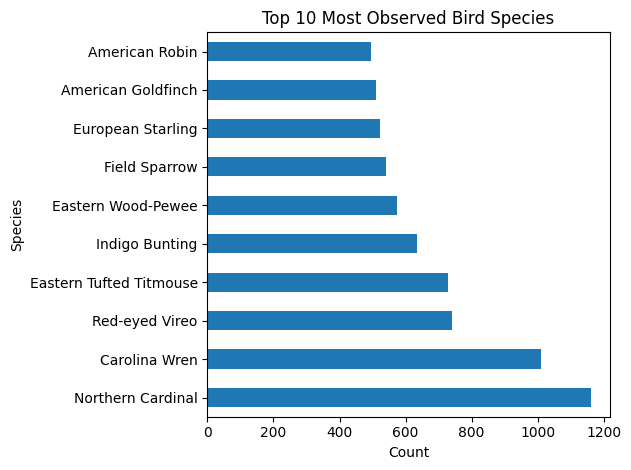

In [30]:
# 1. Top 10 Most Observed Bird Species
top_species = df['common_name'].value_counts().nlargest(10)
top_species.plot(kind='barh', title='Top 10 Most Observed Bird Species')
plt.xlabel("Count")
plt.ylabel("Species")
plt.tight_layout()
plt.show()

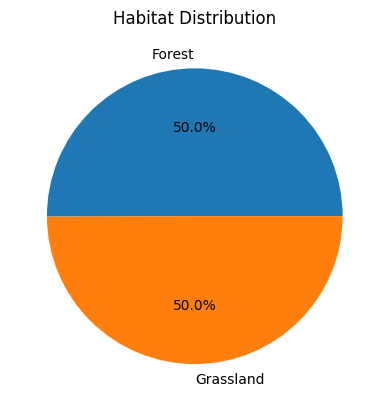

In [31]:
# 2. Habitat Distribution
df['Habitat'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Habitat Distribution')
plt.ylabel("")
plt.show()

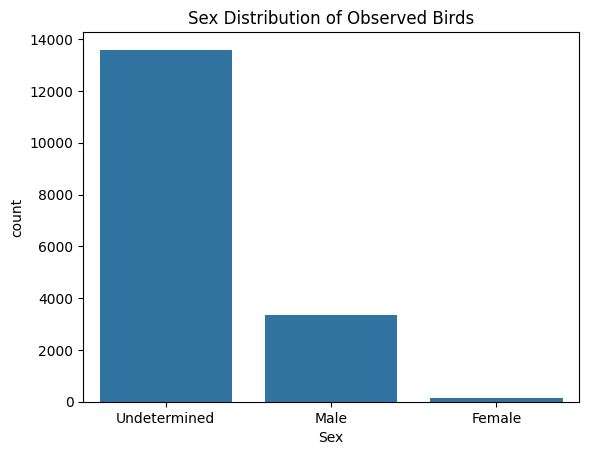

In [32]:
# 3. Sex Distribution
sns.countplot(data=df, x='Sex')
plt.title("Sex Distribution of Observed Birds")
plt.show()

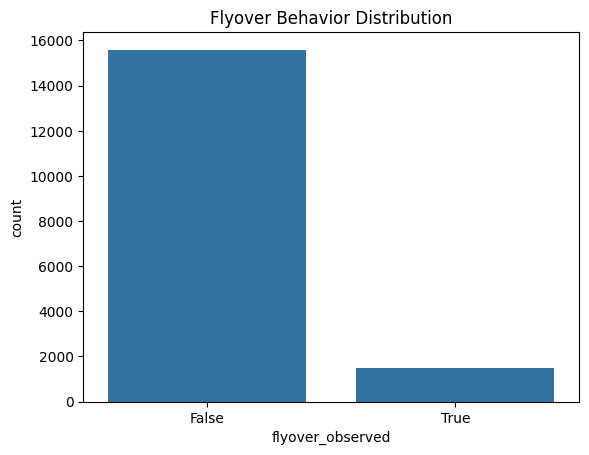

In [33]:
# 4. Flyover Behavior Distribution
sns.countplot(data=df, x='flyover_observed')
plt.title("Flyover Behavior Distribution")
plt.show()

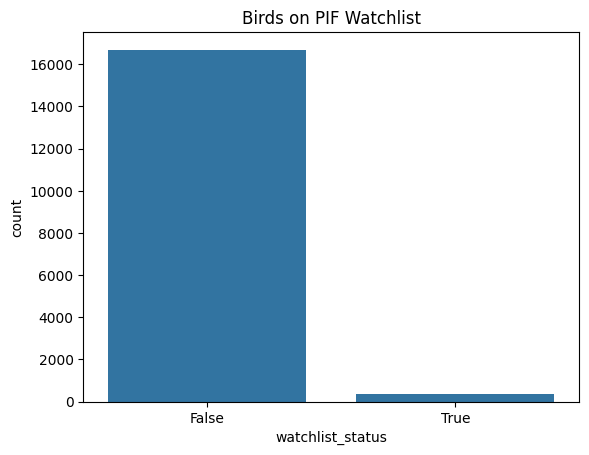

In [34]:
# 5. PIF Watchlist Status
sns.countplot(data=df, x='watchlist_status')
plt.title("Birds on PIF Watchlist")
plt.show()

2️⃣ Temporal Analysis

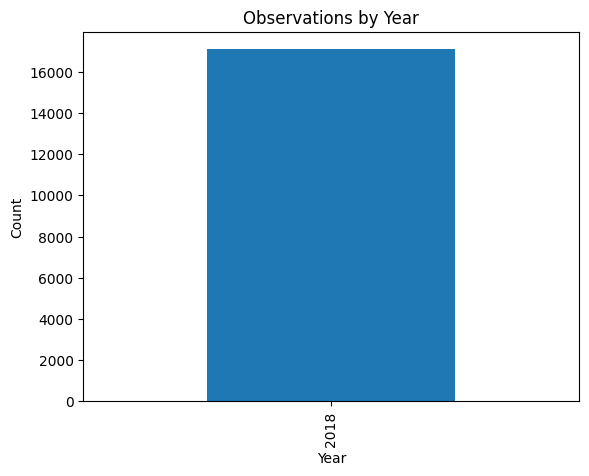

In [35]:
# 6. Observations by Year
df['Year'].value_counts().sort_index().plot(kind='bar', title='Observations by Year')
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

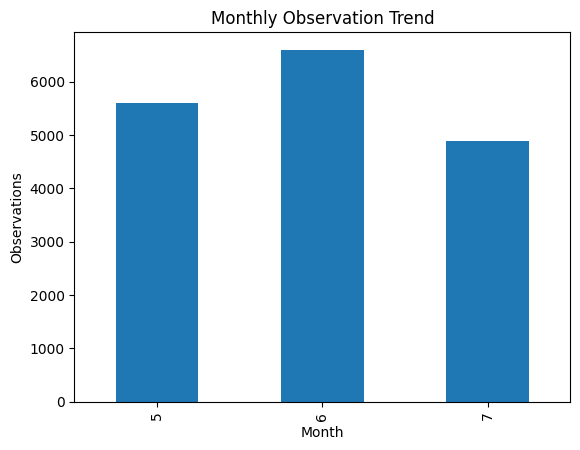

In [36]:
# 7. Monthly Observation Trend
df['Month'].value_counts().sort_index().plot(kind='bar', title='Monthly Observation Trend')
plt.xlabel("Month")
plt.ylabel("Observations")
plt.show()

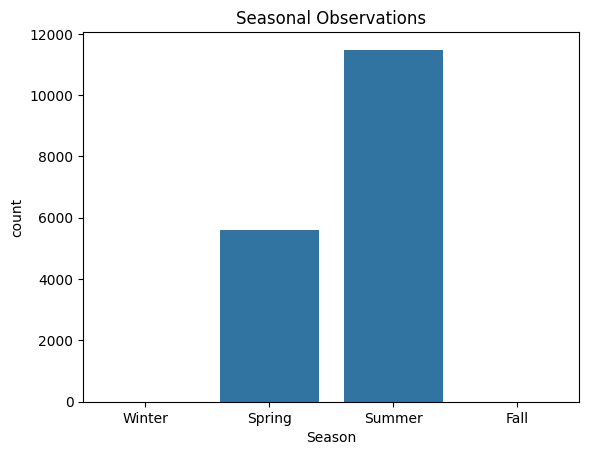

In [37]:
# 8. Seasonal Observations
sns.countplot(data=df, x='Season', order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title("Seasonal Observations")
plt.show()

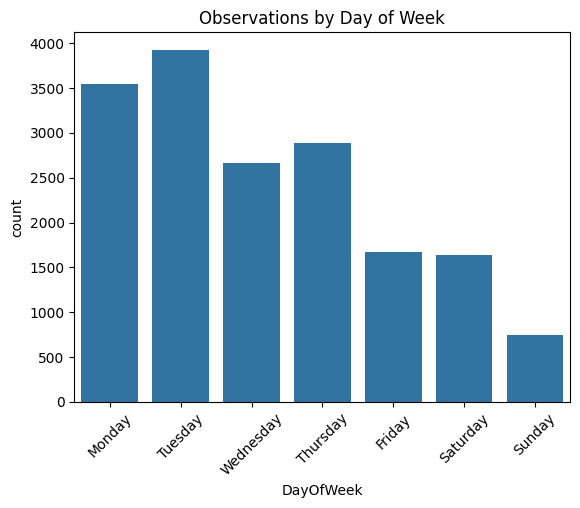

In [38]:
# 9. Observations by Day of Week
df['DayOfWeek'] = df['Date'].dt.day_name()
sns.countplot(data=df, x='DayOfWeek', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Observations by Day of Week")
plt.xticks(rotation=45)
plt.show()

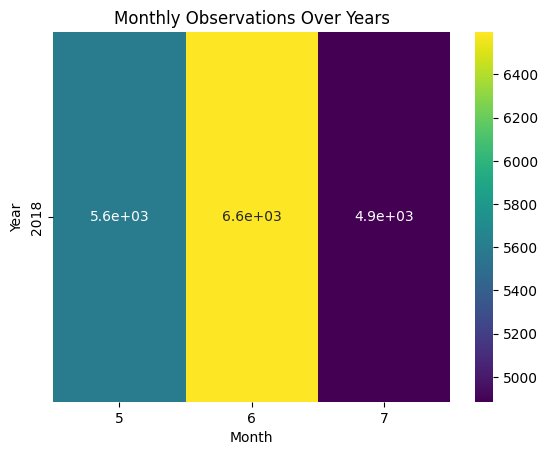

In [39]:
# 10. Heatmap: Month vs Year
pivot = pd.crosstab(df['Year'], df['Month'])
sns.heatmap(pivot, cmap='viridis', annot=True)
plt.title("Monthly Observations Over Years")
plt.show()

3️⃣ Spatial Analysis

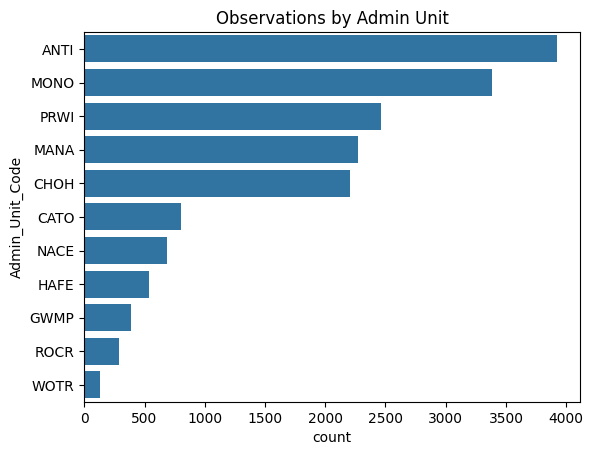

In [40]:
# 11. Observations by Admin Unit
sns.countplot(data=df, y='Admin_Unit_Code', order=df['Admin_Unit_Code'].value_counts().index)
plt.title("Observations by Admin Unit")
plt.show()

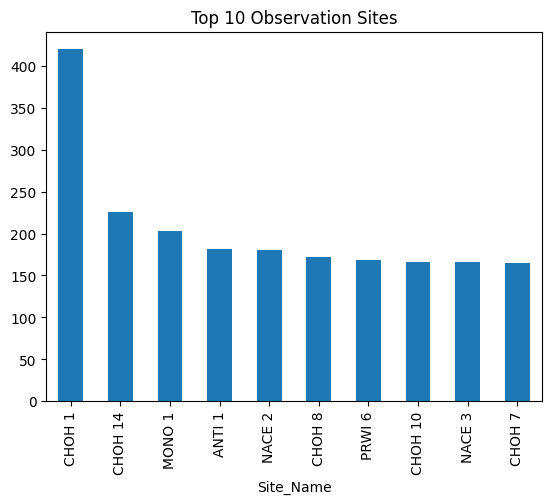

In [41]:
# 12. Top 10 Observation Sites
top_sites = df['Site_Name'].value_counts().nlargest(10)
top_sites.plot(kind='bar', title='Top 10 Observation Sites')
plt.xticks(rotation=90)
plt.show()

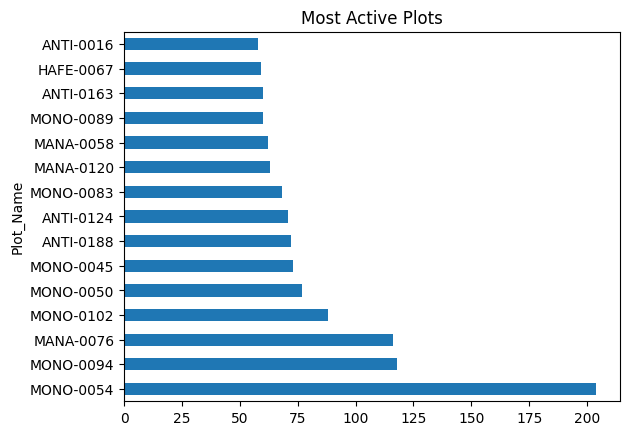

In [42]:
# 13. Most Active Plots
top_plots = df['Plot_Name'].value_counts().nlargest(15)
top_plots.plot(kind='barh', title='Most Active Plots')
plt.show()

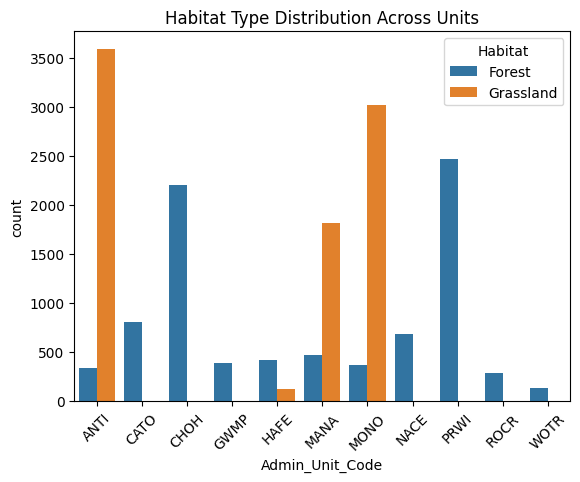

In [43]:
# 14. Habitat Distribution Across Admin Units
sns.countplot(data=df, x='Admin_Unit_Code', hue='Habitat')
plt.title("Habitat Type Distribution Across Units")
plt.xticks(rotation=45)
plt.show()

4️⃣ Species Diversity & Behavior

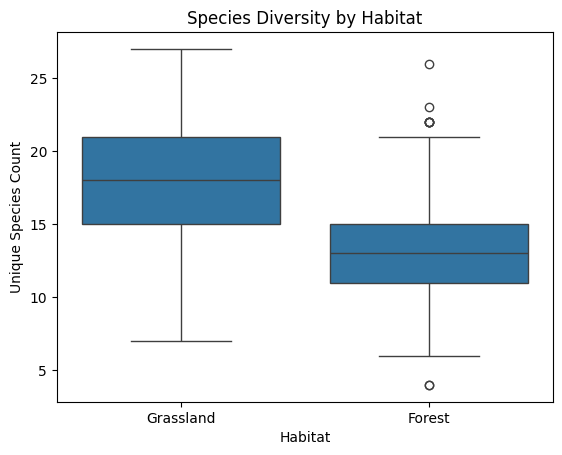

In [44]:
# 15. Species Diversity by Habitat
species_per_plot = df.groupby('Plot_Name')['scientific_name'].nunique().reset_index()
species_per_plot = species_per_plot.merge(df[['Plot_Name','Habitat']].drop_duplicates(), on='Plot_Name')
sns.boxplot(data=species_per_plot, x='Habitat', y='scientific_name')
plt.title("Species Diversity by Habitat")
plt.ylabel("Unique Species Count")
plt.show()

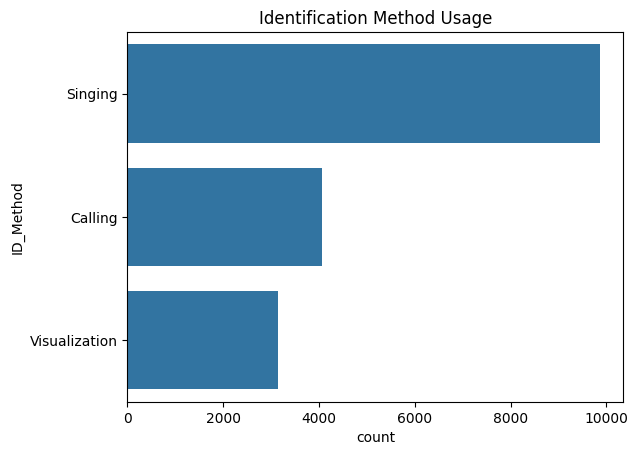

In [45]:
# 16. Identification Method Usage
sns.countplot(data=df, y='ID_Method', order=df['ID_Method'].value_counts().index)
plt.title("Identification Method Usage")
plt.show()

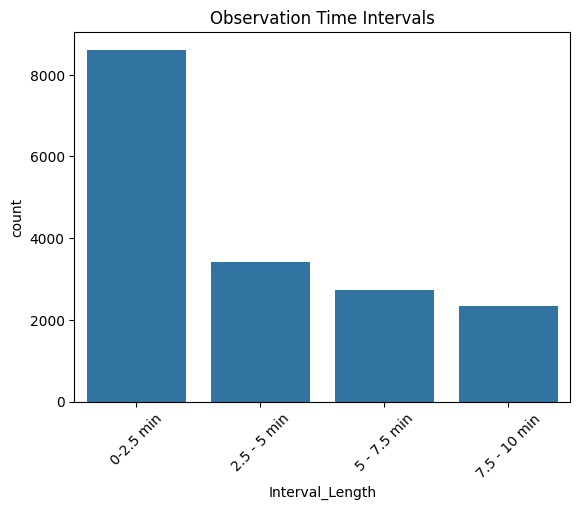

In [46]:
# 17. Observation Time Intervals
sns.countplot(data=df, x='Interval_Length', order=sorted(df['Interval_Length'].dropna().unique()))
plt.title("Observation Time Intervals")
plt.xticks(rotation=45)
plt.show()

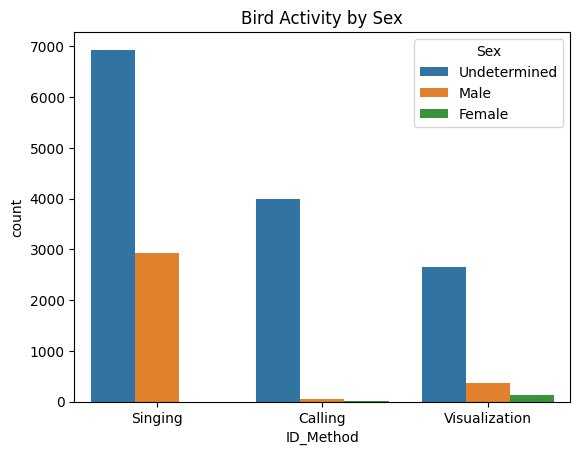

In [47]:
# 18. Bird Activity by Sex
sns.countplot(data=df, x='ID_Method', hue='Sex')
plt.title("Bird Activity by Sex")
plt.show()

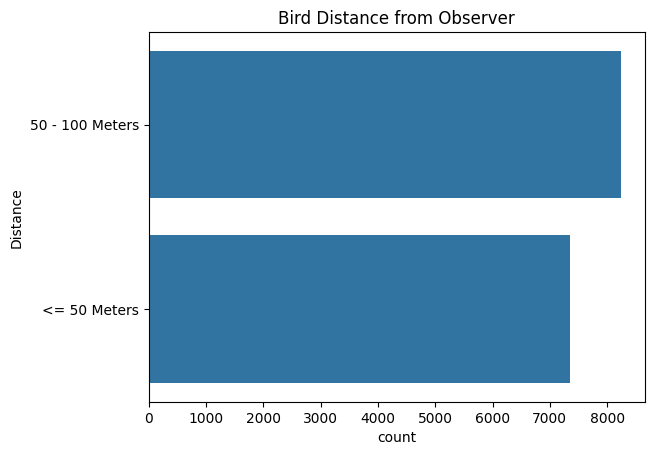

In [48]:
# 19. Bird Distance from Observer
sns.countplot(data=df, y='Distance', order=df['Distance'].value_counts().index)
plt.title("Bird Distance from Observer")
plt.show()

5️⃣ Environmental Conditions

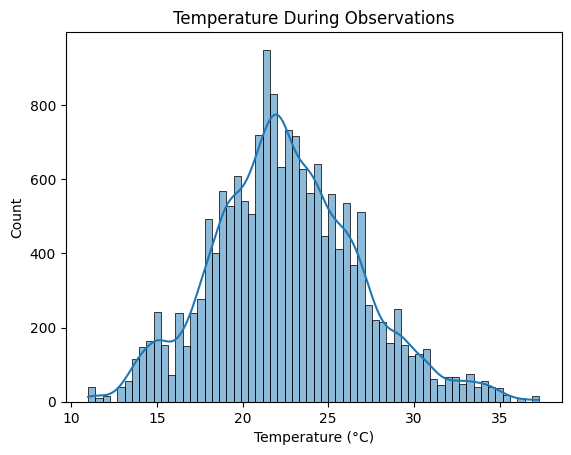

In [49]:
# 20. Temperature Distribution
sns.histplot(df['Temperature'], kde=True)
plt.title("Temperature During Observations")
plt.xlabel("Temperature (°C)")
plt.show()

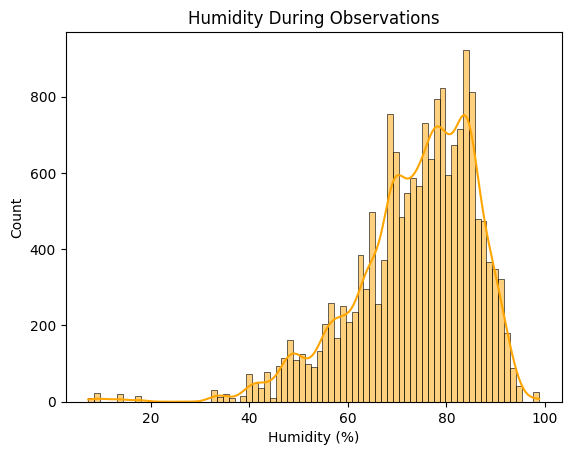

In [50]:
# 21. Humidity Distribution
sns.histplot(df['Humidity'], kde=True, color='orange')
plt.title("Humidity During Observations")
plt.xlabel("Humidity (%)")
plt.show()

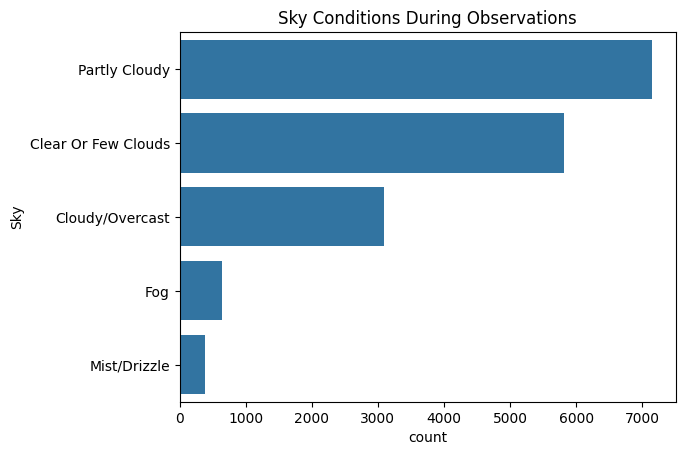

In [51]:
# 22. Sky Conditions
sns.countplot(data=df, y='Sky', order=df['Sky'].value_counts().index)
plt.title("Sky Conditions During Observations")
plt.show()

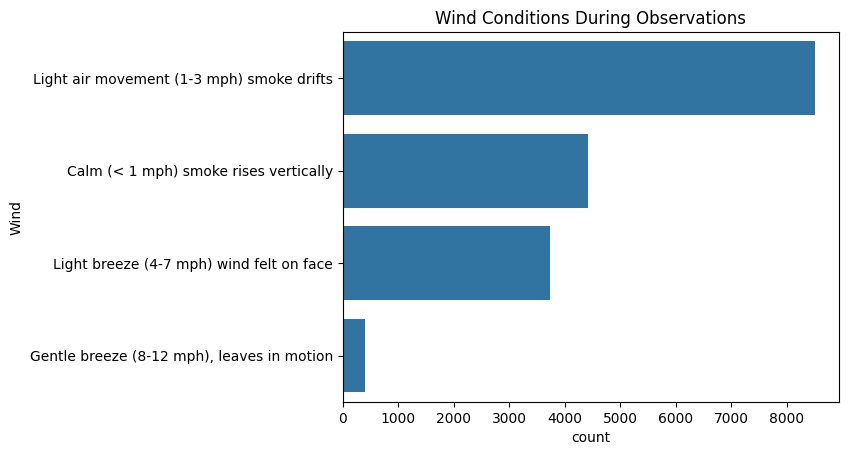

In [52]:
# 23. Wind Conditions
sns.countplot(data=df, y='Wind', order=df['Wind'].value_counts().index)
plt.title("Wind Conditions During Observations")
plt.show()

6️⃣ Observer & Visit Trends

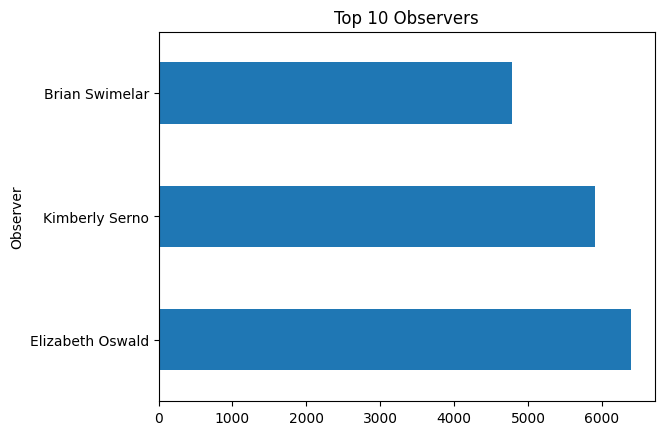

In [53]:
# 24. Top 10 Observers
top_obs = df['Observer'].value_counts().nlargest(10)
top_obs.plot(kind='barh', title='Top 10 Observers')
plt.show()

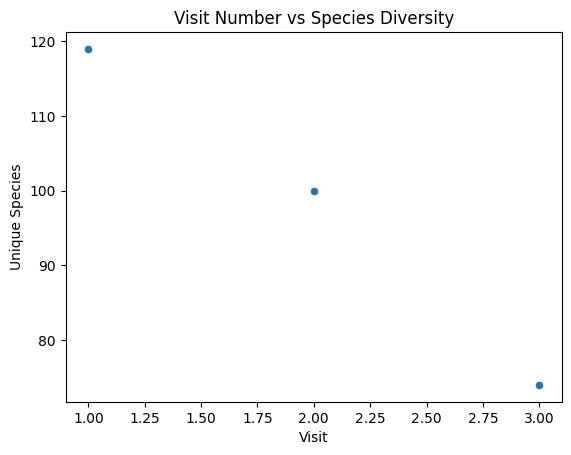

In [54]:
# 25. Visit Number vs Species Diversity
visit_species = df.groupby('Visit')['scientific_name'].nunique()
sns.scatterplot(x=visit_species.index, y=visit_species.values)
plt.title("Visit Number vs Species Diversity")
plt.xlabel("Visit")
plt.ylabel("Unique Species")
plt.show()

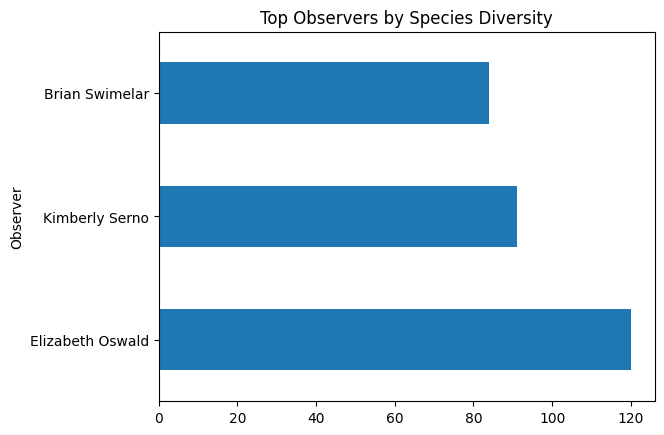

In [55]:
# 26. Top Observers by Species Diversity
observer_species = df.groupby('Observer')['scientific_name'].nunique().sort_values(ascending=False).head(10)
observer_species.plot(kind='barh', title='Top Observers by Species Diversity')
plt.show()

7️⃣ Conservation & Risk Analysis

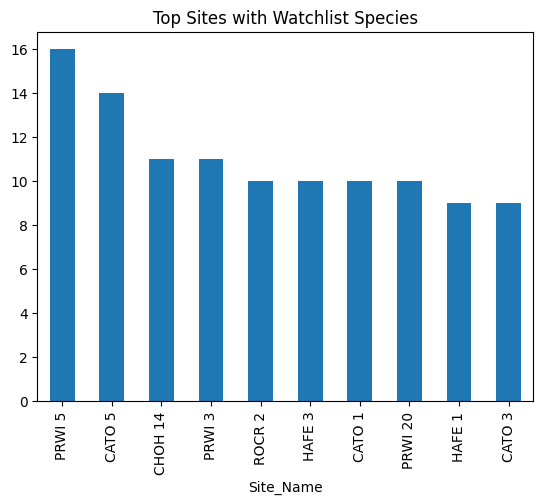

In [56]:
# 27. Watchlist Species by Site
watchlist_counts = df[df['watchlist_status'] == True]['Site_Name'].value_counts().nlargest(10)
watchlist_counts.plot(kind='bar', title='Top Sites with Watchlist Species')
plt.xticks(rotation=90)
plt.show()

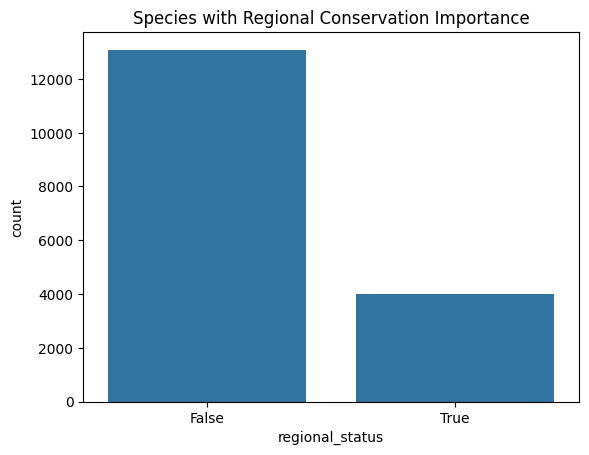

In [57]:
# 28. Regional Stewardship Status
sns.countplot(data=df, x='regional_status')
plt.title("Species with Regional Conservation Importance")
plt.show()

In [58]:
import plotly.express as px

fig = px.bar(top_species, x=top_species.values, y=top_species.index, orientation='h',
             title='Top 10 Most Observed Species', labels={'x': 'Count', 'y': 'Species'})
fig.show()

In [62]:
!pip install streamlit pyngrok

In [72]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

# Load cleaned dataset
df = pd.read_csv("cleaned_bird_observation_data.csv")

# Page config
st.set_page_config(page_title="Bird Species Observation Dashboard", layout="wide")
st.title("🕊️ Bird Species Observation Analysis")
st.markdown("""
Explore bird species observations across different locations, habitats, and environmental conditions using this interactive dashboard.
""")

# Sidebar filters
with st.sidebar:
    st.header("Filters")
    year = st.multiselect("Select Year(s)", options=sorted(df['Year'].dropna().unique()), default=sorted(df['Year'].dropna().unique()))
    habitat = st.multiselect("Select Habitat(s)", options=df['Habitat'].dropna().unique(), default=df['Habitat'].dropna().unique())
    season = st.multiselect("Select Season(s)", options=['Winter', 'Spring', 'Summer', 'Fall'], default=['Winter', 'Spring', 'Summer', 'Fall'])
    observer = st.multiselect("Select Observer(s)", options=df['Observer'].dropna().unique())

# Apply filters
filtered_df = df[df['Year'].isin(year) & df['Habitat'].isin(habitat) & df['Season'].isin(season)]
if observer:
    filtered_df = filtered_df[filtered_df['Observer'].isin(observer)]

# KPI Section
st.subheader("Key Statistics")
kpi1, kpi2, kpi3, kpi4 = st.columns(4)
kpi1.metric("Total Observations", len(filtered_df))
kpi2.metric("Unique Species", filtered_df['scientific_name'].nunique())
kpi3.metric("Watchlist Species", filtered_df[filtered_df['watchlist_status']==True]['scientific_name'].nunique())
kpi4.metric("Unique Sites", filtered_df['Site_Name'].nunique())

# Tabs for sections
tab1, tab2, tab3, tab4 = st.tabs(["Species Distribution", "Time Trends", "Environmental Factors", "Observer Insights"])

with tab1:
    st.subheader("Top 10 Most Observed Bird Species")
    species_count = filtered_df['common_name'].value_counts().nlargest(10).reset_index()
    species_count.columns = ['common_name', 'count']
    fig1 = px.bar(species_count, x='common_name', y='count', labels={'common_name': 'Species', 'count': 'Count'})
    st.plotly_chart(fig1, use_container_width=True)

    st.subheader("Observation by Habitat")
    fig2 = px.pie(filtered_df, names='Habitat', title='Habitat Distribution')
    st.plotly_chart(fig2, use_container_width=True)

with tab2:
    st.subheader("Observation Trends Over Time")
    by_year = filtered_df.groupby('Year')['common_name'].count().reset_index()
    fig3 = px.bar(by_year, x='Year', y='common_name', title='Observations by Year', labels={'common_name': 'Count'})
    st.plotly_chart(fig3, use_container_width=True)

    by_month = filtered_df['Month'].value_counts().sort_index().reset_index()
    by_month.columns = ['Month', 'Count']
    fig4 = px.bar(by_month, x='Month', y='Count', title='Observations by Month')
    st.plotly_chart(fig4, use_container_width=True)

    st.subheader("Seasonal Observation Trend")
    season_count = filtered_df['Season'].value_counts().reset_index()
    season_count.columns = ['Season', 'Count']
    fig5 = px.bar(season_count, x='Season', y='Count')
    st.plotly_chart(fig5, use_container_width=True)

with tab3:
    st.subheader("Temperature and Humidity Distribution")
    col1, col2 = st.columns(2)
    with col1:
        fig6 = px.histogram(filtered_df, x='Temperature', nbins=30, title='Temperature Distribution')
        st.plotly_chart(fig6, use_container_width=True)
    with col2:
        fig7 = px.histogram(filtered_df, x='Humidity', nbins=30, title='Humidity Distribution')
        st.plotly_chart(fig7, use_container_width=True)

    st.subheader("Sky and Wind Conditions")
    col3, col4 = st.columns(2)
    with col3:
        sky_count = filtered_df['Sky'].value_counts().reset_index()
        sky_count.columns = ['Sky', 'Count']
        fig8 = px.bar(sky_count, x='Sky', y='Count')
        st.plotly_chart(fig8, use_container_width=True)
    with col4:
        wind_count = filtered_df['Wind'].value_counts().reset_index()
        wind_count.columns = ['Wind', 'Count']
        fig9 = px.bar(wind_count, x='Wind', y='Count')
        st.plotly_chart(fig9, use_container_width=True)

with tab4:
    st.subheader("Top 10 Observers")
    top_obs = filtered_df['Observer'].value_counts().nlargest(10).reset_index()
    top_obs.columns = ['Observer', 'Observations']
    fig10 = px.bar(top_obs, x='Observer', y='Observations')
    st.plotly_chart(fig10, use_container_width=True)

    st.subheader("Observers by Species Diversity")
    obs_species = filtered_df.groupby('Observer')['scientific_name'].nunique().sort_values(ascending=False).head(10).reset_index()
    obs_species.columns = ['Observer', 'Unique Species']
    fig11 = px.bar(obs_species, x='Observer', y='Unique Species')
    st.plotly_chart(fig11, use_container_width=True)

st.markdown("---")
st.caption("Developed using Streamlit and Plotly ✨ | Bird Monitoring Dataset")



Overwriting app.py


In [73]:
!ngrok config add-authtoken 30ouqfidx9q4uMSezz0XMs9vAfW_73wuWFD6tt2ve6M3XRWmG

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [74]:
from pyngrok import ngrok
import os

os.system('streamlit run app.py &')
public_url = ngrok.connect(addr="8501", proto="http")
print("👇 Click this link to open your Streamlit App 👇\n", public_url)


👇 Click this link to open your Streamlit App 👇
 NgrokTunnel: "https://c04d8cb0f096.ngrok-free.app" -> "http://localhost:8501"
